In [31]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [32]:

# Function to load and preprocess image dataset
def load_and_preprocess_data(root_folder):
    class_labels = []
    images = []
    labels = []

    # Iterate through each class in the dataset
    for label in os.listdir(root_folder):
        class_path = os.path.join(root_folder, label)
        if os.path.isdir(class_path):
            class_labels.append(label)
            
            # Load and preprocess each image in the class
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)  # Load image using OpenCV
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                # img = cv2.resize(img, (128, 128))  # Resize to a common size
                images.append(img.flatten())  # Flatten the image and add to the list
                labels.append(label)
            
    return np.array(images), np.array(labels), class_labels

In [33]:

# Load and preprocess data
root_folder = 'Images'
X, y, class_labels = load_and_preprocess_data(root_folder)

In [34]:

# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [35]:

# Create a DataFrame
df = pd.DataFrame(X)
df['Label'] = y

In [36]:

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Apply PCA for dimensionality reduction
n_components = 2  # Adjust this value based on your needs
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

C:\Users\eslam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eslam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eslam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\eslam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

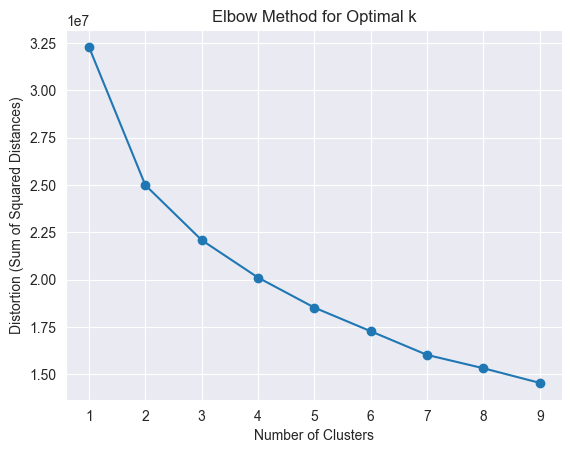

In [38]:
distortions = []    
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 10), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Sum of Squared Distances)')
plt.show()

In [39]:
# Apply K-means clustering to the PCA-transformed data
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
y_pred = kmeans.fit_predict(X_pca)

C:\Users\eslam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


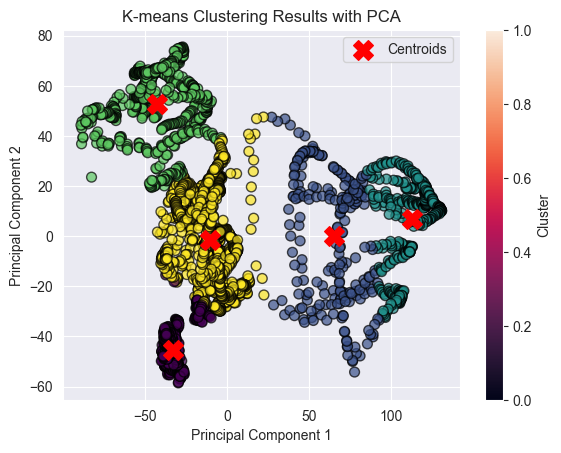

In [40]:

# Visualize the results
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [41]:

# Evaluate the clustering performance
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.17202596370312517
Inertia: 1252399.4193072354
